In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.6.4


In [11]:
train_dir = Path('../input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [12]:
test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [14]:
val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [15]:
def image_processing(filepath):
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [16]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [17]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['bell pepper' 'ginger' 'cucumber' 'orange' 'cabbage' 'cauliflower' 'kiwi'
 'raddish' 'chilli pepper' 'onion' 'eggplant' 'jalepeno' 'sweetpotato'
 'lettuce' 'pomegranate' 'sweetcorn' 'banana' 'tomato' 'capsicum' 'peas'
 'potato' 'pear' 'paprika' 'turnip' 'mango' 'soy beans' 'spinach' 'corn'
 'watermelon' 'apple' 'beetroot' 'garlic' 'lemon' 'grapes' 'pineapple'
 'carrot']


In [18]:
train_df.head(5)

,Filepath,Label
0,../input/fruit-and-vegetable-image-recognition...,bell pepper
1,../input/fruit-and-vegetable-image-recognition...,ginger
2,../input/fruit-and-vegetable-image-recognition...,cucumber
3,../input/fruit-and-vegetable-image-recognition...,orange
4,../input/fruit-and-vegetable-image-recognition...,cabbage


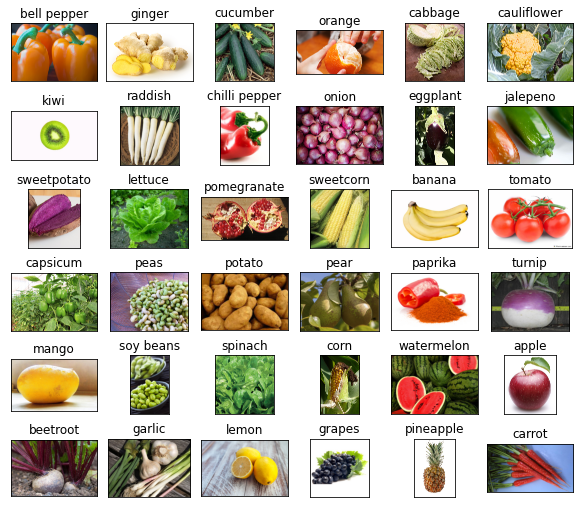

In [19]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [22]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [23]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [24]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [26]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [27]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

2022-10-11 07:03:53.586665: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


9420800/9406464 [==============================] - 0s 0us/step


In [48]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
87/87 [==============================] - 217s 2s/step - loss: 1.7846 - accuracy: 0.5306 - val_loss: 0.4203 - val_accuracy: 0.8653
Epoch 2/5
87/87 [==============================] - 175s 2s/step - loss: 0.5571 - accuracy: 0.8263 - val_loss: 0.2534 - val_accuracy: 0.9251
Epoch 3/5
87/87 [==============================] - 170s 2s/step - loss: 0.3291 - accuracy: 0.8892 - val_loss: 0.2293 - val_accuracy: 0.9012
Epoch 4/5
87/87 [==============================] - 170s 2s/step - loss: 0.2226 - accuracy: 0.9245 - val_loss: 0.1667 - val_accuracy: 0.9581
Epoch 5/5
87/87 [==============================] - 190s 2s/step - loss: 0.1451 - accuracy: 0.9536 - val_loss: 0.1494 - val_accuracy: 0.9611


In [49]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

['potato',
 'cabbage',
 'tomato',
 'bell pepper',
 'raddish',
 'banana',
 'banana',
 'grapes',
 'corn',
 'capsicum',
 'garlic',
 'apple',
 'pineapple',
 'capsicum',
 'pear',
 'beetroot',
 'cucumber',
 'mango',
 'soy beans',
 'orange',
 'kiwi',
 'chilli pepper',
 'capsicum',
 'spinach',
 'watermelon',
 'pomegranate',
 'watermelon',
 'lemon',
 'watermelon',
 'garlic',
 'corn',
 'sweetcorn',
 'peas',
 'onion',
 'pineapple',
 'pear',
 'pomegranate',
 'grapes',
 'apple',
 'sweetpotato',
 'paprika',
 'paprika',
 'bell pepper',
 'soy beans',
 'ginger',
 'corn',
 'sweetpotato',
 'cucumber',
 'bell pepper',
 'watermelon',
 'carrot',
 'jalepeno',
 'corn',
 'jalepeno',
 'pineapple',
 'banana',
 'raddish',
 'cucumber',
 'ginger',
 'mango',
 'peas',
 'grapes',
 'corn',
 'paprika',
 'onion',
 'turnip',
 'spinach',
 'lemon',
 'eggplant',
 'beetroot',
 'peas',
 'orange',
 'turnip',
 'turnip',
 'grapes',
 'tomato',
 'ginger',
 'orange',
 'mango',
 'ginger',
 'lettuce',
 'kiwi',
 'bell pepper',
 'beetro

In [51]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [52]:
img = output('../input/fruit-and-vegetable-image-recognition/test/banana/Image_1.jpg')
img

'banana'

In [30]:
model.save('FV.h5')

In [53]:
predic = model.evaluate(test_images)

11/11 [==============================] - 24s 2s/step - loss: 0.1494 - accuracy: 0.9611


In [58]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [57]:
predic = model.evaluate(val_images)

11/11 [==============================] - 23s 2s/step - loss: 0.1494 - accuracy: 0.9611
